## Observations and Insights 

In [151]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import os

In [139]:
! pip install bokeh

In [2]:
#setting background of figure black
plt.style.use('ggplot')

In [3]:
#Set Fonts/Plot Style
rcParams['figure.figsize'] = [12.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

In [4]:
# bokeh packages
from bokeh.io import output_file,show,output_notebook,push_notebook,curdoc
from bokeh.plotting import figure 
from bokeh.models import ColumnDataSource,HoverTool,CategoricalColorMapper, ColorBar, Select, Slider
from bokeh.palettes import Category10, Spectral6
from bokeh.layouts import row,column,gridplot,widgetbox
from bokeh.models.widgets import Tabs,Panel
from bokeh.transform import linear_cmap
output_notebook()

Loading BokehJS ...

In [5]:
# Study data files
mouse_metadata_path = os.path.join("data","Mouse_metadata.csv")
study_results_path = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [6]:
#Looking mouse metadata datasets
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [7]:
#shape of dataframe
mouse_metadata.shape

(249, 5)

In [8]:
#columns name
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [9]:
#info of dataframe
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [10]:
mouse_metadata.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [11]:
#Checking if there any null value
mouse_metadata.isna().sum()

Mouse ID        0
Drug Regimen    0
Sex             0
Age_months      0
Weight (g)      0
dtype: int64

In [12]:
#Looking the study results dataframe
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [13]:
study_results.value_counts('Tumor Volume (mm3)')

Tumor Volume (mm3)
45.000000    250
54.834624      1
55.083632      1
55.076229      1
55.039020      1
            ... 
47.235937      1
47.235692      1
47.227171      1
47.222446      1
78.567014      1
Length: 1644, dtype: int64

In [14]:
#shape of dataframe
study_results.shape

(1893, 4)

In [15]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [16]:
#columns name
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [17]:
study_results.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [18]:
#Checking if there any null value
study_results.isna().sum()

Mouse ID              0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [19]:
# Combine the data into a single dataset
df_combined=pd.merge(mouse_metadata, study_results, on="Mouse ID")


In [20]:
# Display the data table for preview
df_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
df_combined.shape

(1893, 8)

In [22]:
df_combined.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [23]:
df_combined.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [24]:
df_combined.isna().sum()

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [25]:
# Checking the number of mice.
df_combined.value_counts("Mouse ID")

Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Length: 249, dtype: int64

In [26]:
df_combined["Mouse ID"].nunique()

249

In [27]:
df_combined[df_combined.duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_filt=df_combined[df_combined.duplicated(subset=['Mouse ID', 'Timepoint'])]
df_filt

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Optional: Get all the data for the duplicate mouse ID. 

df_combined[df_combined.duplicated(subset=['Mouse ID'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_combined=df_combined.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [31]:
# Checking the number of mice in the clean DataFrame.
df_combined.shape

(1888, 8)

## Summary Statistics

In [32]:
df_combined.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_combined.describe().loc[['mean', 'std']]


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507


In [132]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
groupby=df_combined.groupby('Drug Regimen')
mean=groupby['Tumor Volume (mm3)'].median()
median=groupby['Tumor Volume (mm3)'].mean()
std=groupby['Tumor Volume (mm3)'].std()
var=groupby['Tumor Volume (mm3)'].var()
sem=groupby['Tumor Volume (mm3)'].sem()
stats=pd.DataFrame({'Mean':mean, 'Meadian':median,
                    "Variance":var, 'Stand Dev':std,
                    "SEM":sem})
stats

,Mean,Meadian,Variance,Stand Dev,SEM
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,24.947764,4.994774,0.329346
Ceftamin,51.776157,52.591172,39.290177,6.268188,0.469821
Infubinol,51.820584,52.884795,43.128684,6.567243,0.492236
Ketapril,53.698743,55.235638,68.553577,8.279709,0.603860
Naftisol,52.509285,54.331565,66.173479,8.134708,0.596466
Placebo,52.288934,54.033581,61.168083,7.821003,0.581331
Propriva,50.909965,52.393463,43.138803,6.568014,0.525862
Ramicane,40.673236,40.216745,23.486704,4.846308,0.320955
Stelasyn,52.431737,54.233149,59.450562,7.710419,0.573111


In [133]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', 'sem'])

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


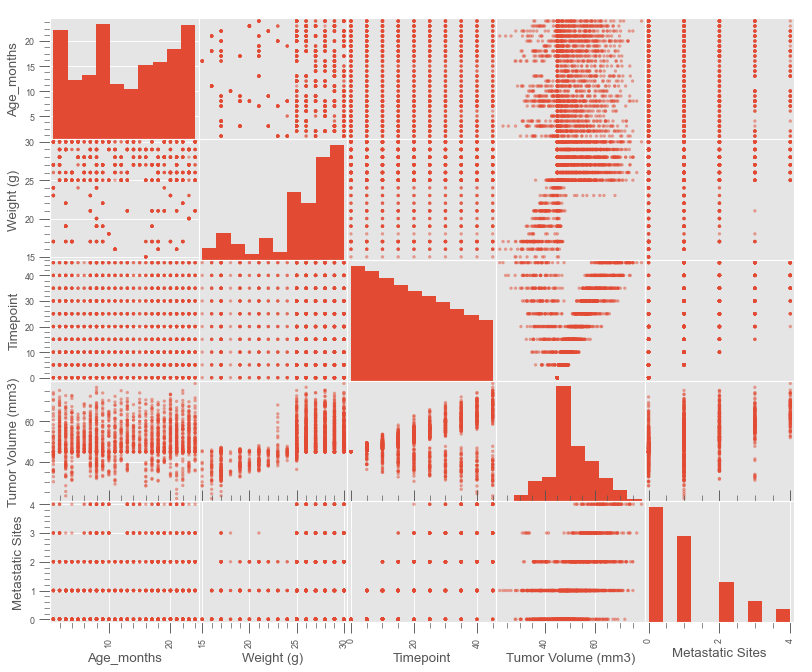

In [148]:
pd.plotting.scatter_matrix(df_combined)
plt.show()

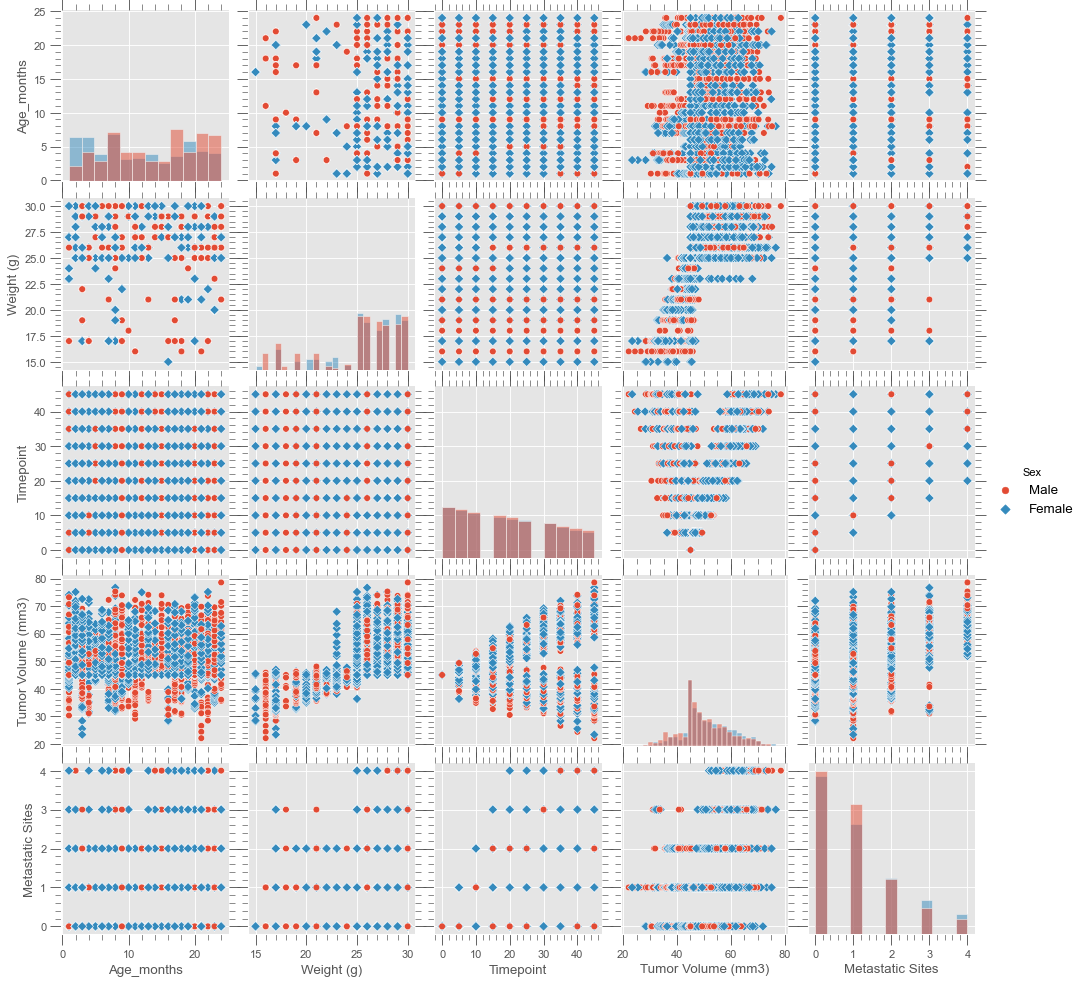

In [140]:
sns.pairplot(df_combined, hue="Sex", markers=["o", "D"], diag_kind="hist")
plt.show()

In [38]:
df_time=df_combined.groupby('Drug Regimen').count().reset_index()
df_time

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,156,156,156,156,156,156,156
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


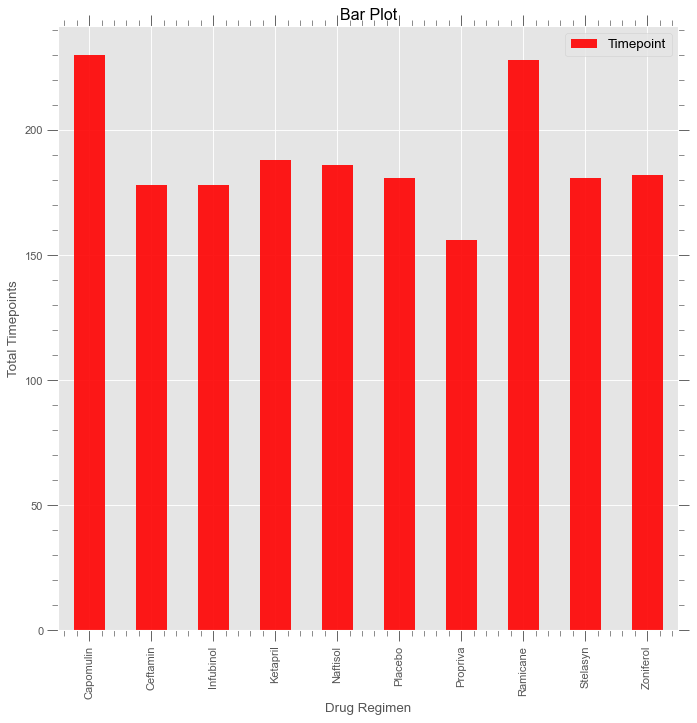

In [113]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
fig, ax=plt.subplots(figsize=(10,10))
df_time.plot(x='Drug Regimen', y='Timepoint',kind='bar',color='red', alpha=0.9, align='center', ax=ax)
ax.set(xlabel="Drug Regimen", ylabel="Total Timepoints", title= "Bar Plot")
#plt.xticks(rotation=45)
plt.show()

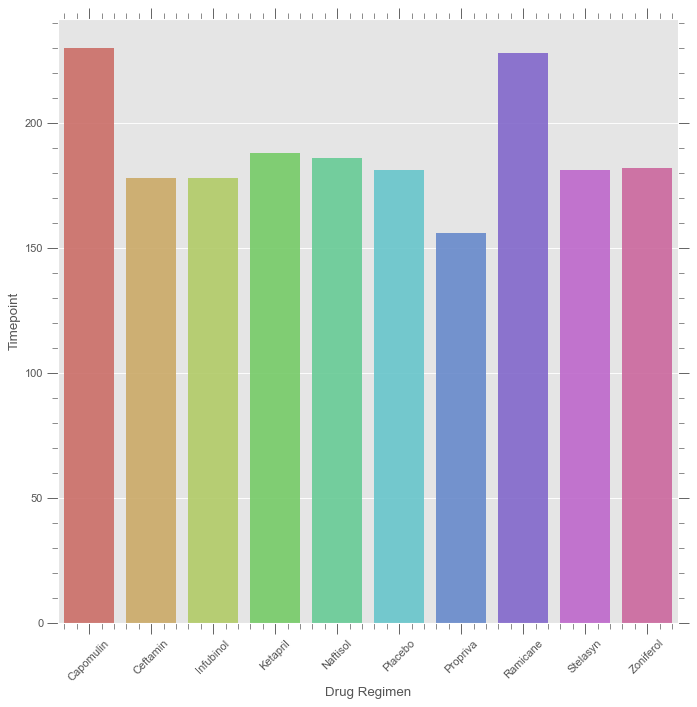

In [114]:
fig, ax=plt.subplots(figsize=(10,10))
sns.barplot(x='Drug Regimen', y='Timepoint',
            data=df_time, alpha=0.9, palette = 'hls',ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

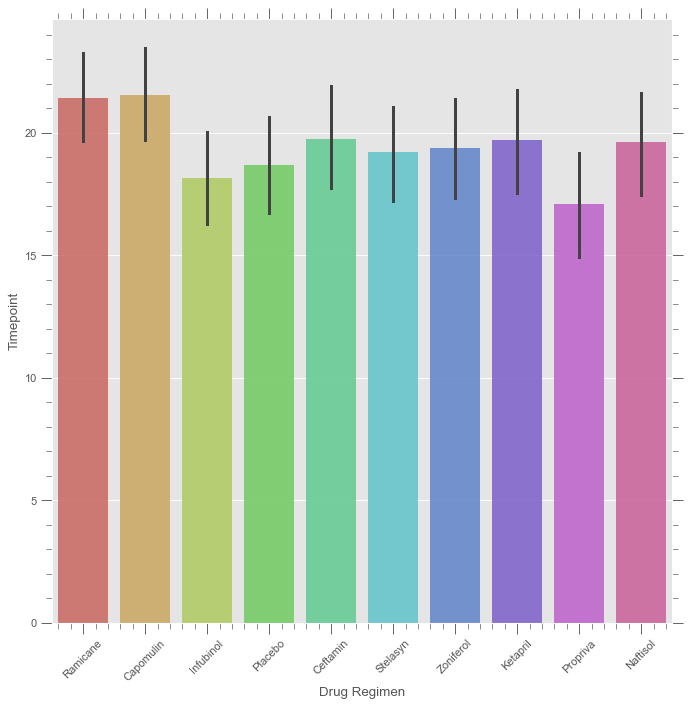

In [110]:
fig, ax=plt.subplots(figsize=(10,10))
sns.barplot(x='Drug Regimen', y='Timepoint',
            data=df_combined, alpha=0.9, palette = 'hls',ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

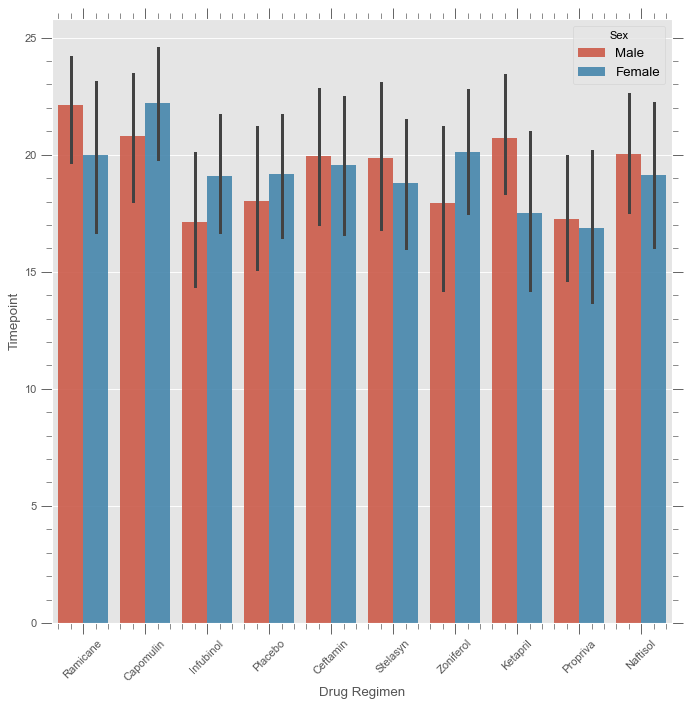

In [115]:
fig, ax=plt.subplots(figsize=(10,10))
sns.barplot(x='Drug Regimen', y='Timepoint',hue='Sex',
            data=df_combined, alpha=0.9,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

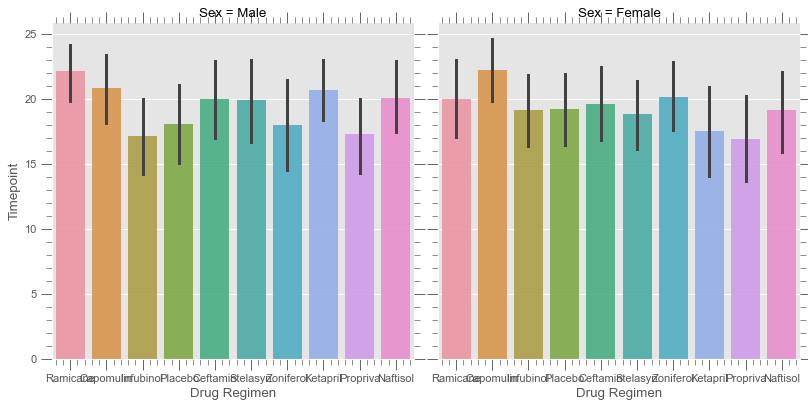

In [126]:

g=sns.catplot(x='Drug Regimen', y='Timepoint',kind='bar',col='Sex',
            data=df_combined, alpha=0.9)

plt.show()

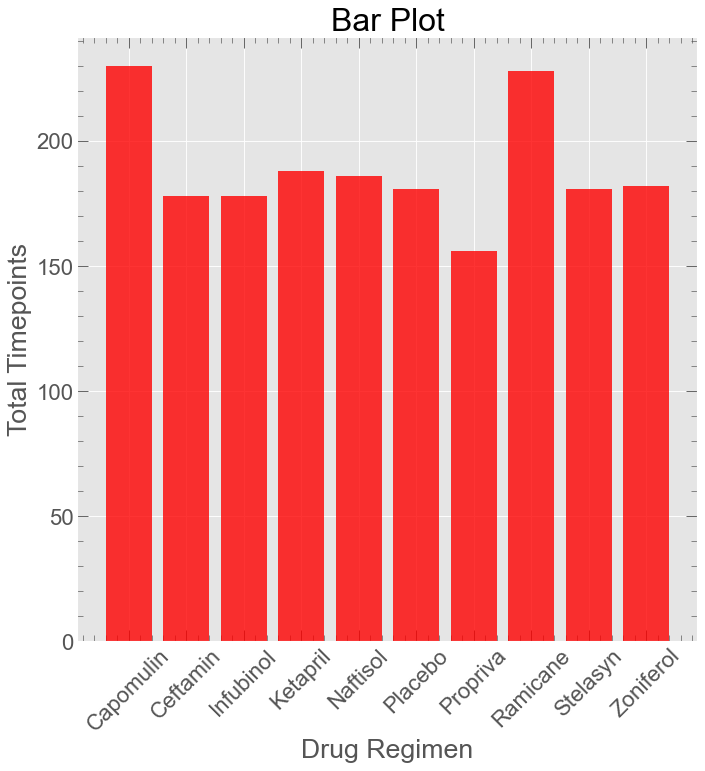

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x=np.arange(0, len(df_time['Drug Regimen']),1)
drugs=df_time['Drug Regimen'].tolist()
fig, ax=plt.subplots(figsize=(10,10))
ax.bar(x, df_time['Timepoint'],color='red', alpha=0.8, align='center')
ax.set(xlabel="Drug Regimen", ylabel="Total Timepoints", title= "Bar Plot")
ax.set_xticks(x)
ax.set_xticklabels(drugs, rotation = 45)
plt.show()


In [44]:
df_gender=df_combined.groupby('Sex').count().reset_index().set_index('Sex')
df_gender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


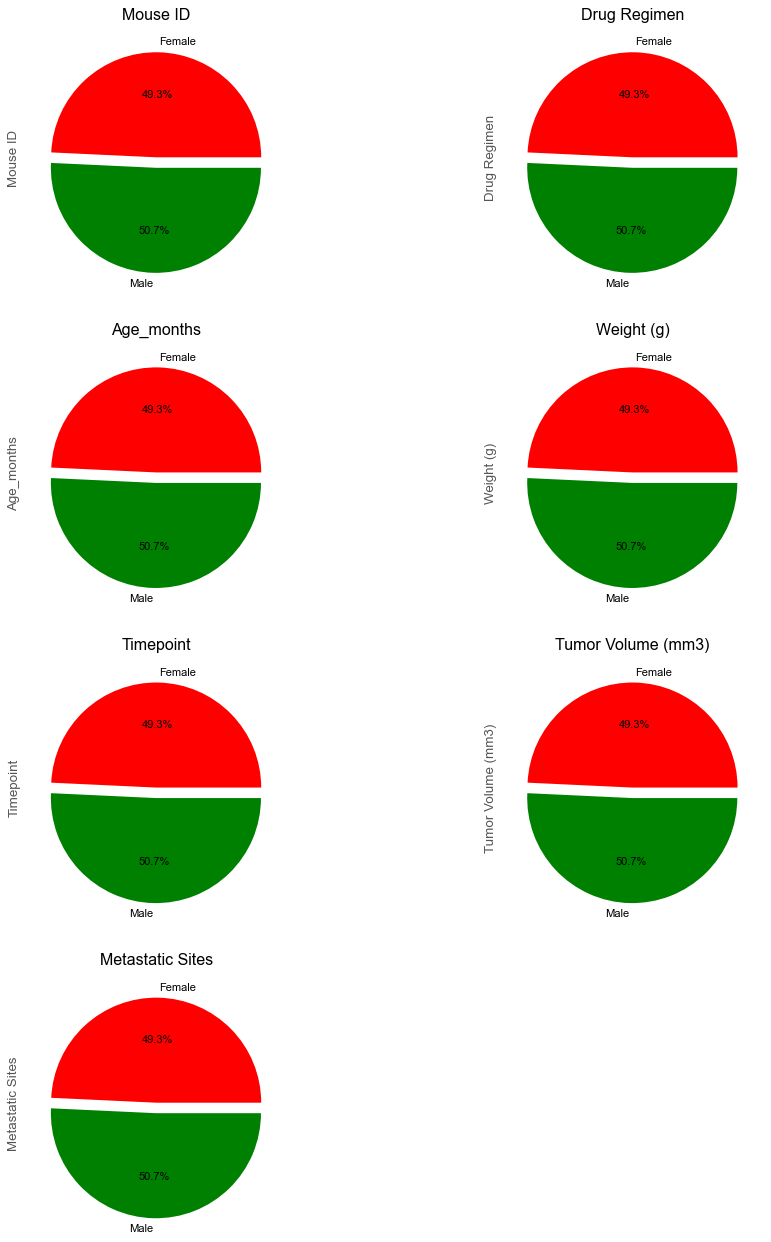

In [91]:
plt.style.use('ggplot')
color=['red', 'green']
fig=plt.figure(figsize=(15,20))
explode = (0, 0.1)
for i, col in zip(range(1, 9), df_gender.columns):
    ax = fig.add_subplot(4, 2, i)
    df_gender[col].plot(kind='pie',labels= df_gender.index, colors=color,
                        autopct='%1.1f%%',title=col,explode=explode, fontsize=10, ax=ax)
    #ax.legend()
fig.subplots_adjust(wspace=.05)
plt.show()

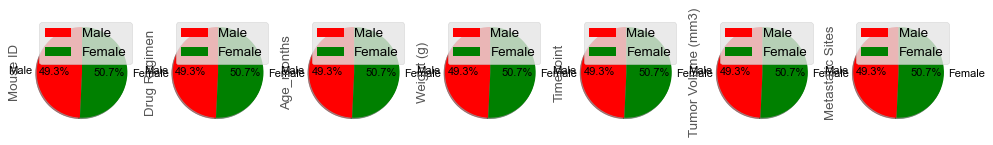

In [76]:
explode = (0, 0.1)
color=['red', 'green']
labels=["Male", "Female"]
df_gender.plot(kind='pie',subplots=True,labels=labels, colors=color, autopct='%1.1f%%',
        shadow=True, startangle=90, figsize=(15, 2))

plt.show()

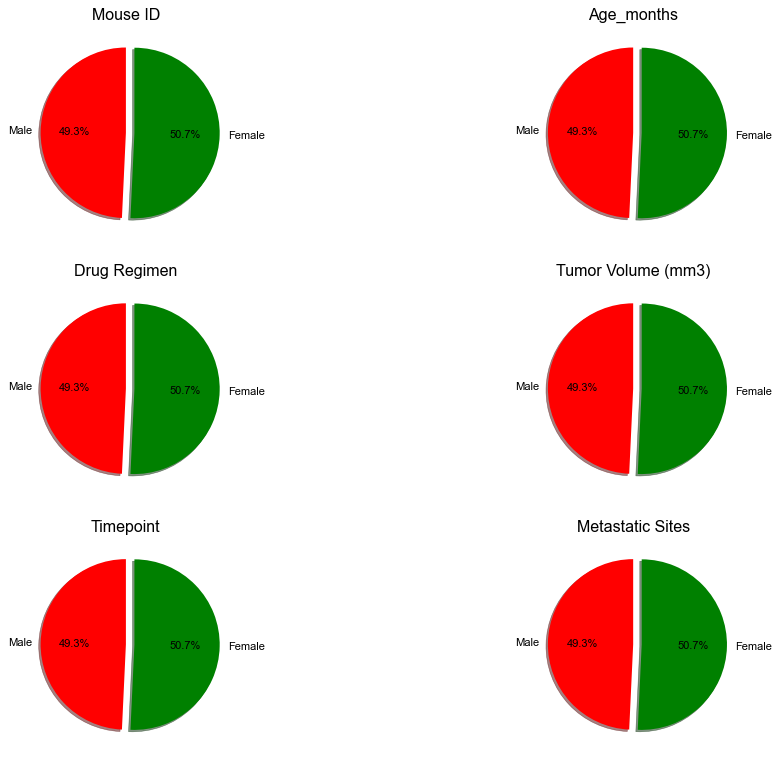

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax=plt.subplots(3,2,figsize=(15,12))
explode = (0, 0.1)
color=['red', 'green']
labels=["Male", "Female"]
ax[0,0].pie(df_gender['Mouse ID'],labels=labels, colors=color,explode=explode, autopct='%1.1f%%',
        shadow=True,  startangle=90)
ax[0,0].set_title('Mouse ID')
ax[1,0].pie(df_gender['Drug Regimen'],labels=labels, colors=color, explode=explode,autopct='%1.1f%%',
        shadow=True,startangle=90)
ax[1,0].set_title('Drug Regimen')
ax[0,1].pie(df_gender['Age_months'],labels=labels, colors=color, explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0,1].set_title('Age_months')
ax[1,1].pie(df_gender['Tumor Volume (mm3)'],labels=labels, explode=explode,colors=color, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1,1].set_title('Tumor Volume (mm3)')
ax[2,0].pie(df_gender['Timepoint'],labels=labels, colors=color, explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[2,0].set_title('Timepoint')
ax[2,1].pie(df_gender['Metastatic Sites'],labels=labels, explode=explode,colors=color, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[2,1].set_title('Metastatic Sites')

plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#df_tumor=df_combined.set_index("Drug Regimen")
#df_tumor=df_tumor.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
# Start by getting the last (greatest) timepoint for each mouse
df_tumor=df_combined[df_combined['Drug Regimen']. isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
df_greater=df_tumor.loc[df_tumor.groupby(['Mouse ID'])['Timepoint'].idxmax()]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#df_greater=df_tumor[df_tumor['Timepoint']==45]
df_greater

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [50]:
quartiles = df_greater['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
upperq

59.930261755

In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=df_greater['Drug Regimen'].tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [172]:
quartiles=df_greater['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
upperq=quartiles[0.75]
lowerq=quartiles[0.25]
iqr=upperq-lowerq
print(f"The lower quartile  is: {lowerq}")
print(f"The upper quartile  is: {upperq}")
print(f"The interquartile range  is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile  is: 37.1877438025
The upper quartile  is: 59.930261755
The interquartile range  is: 22.742517952499995
The the median is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


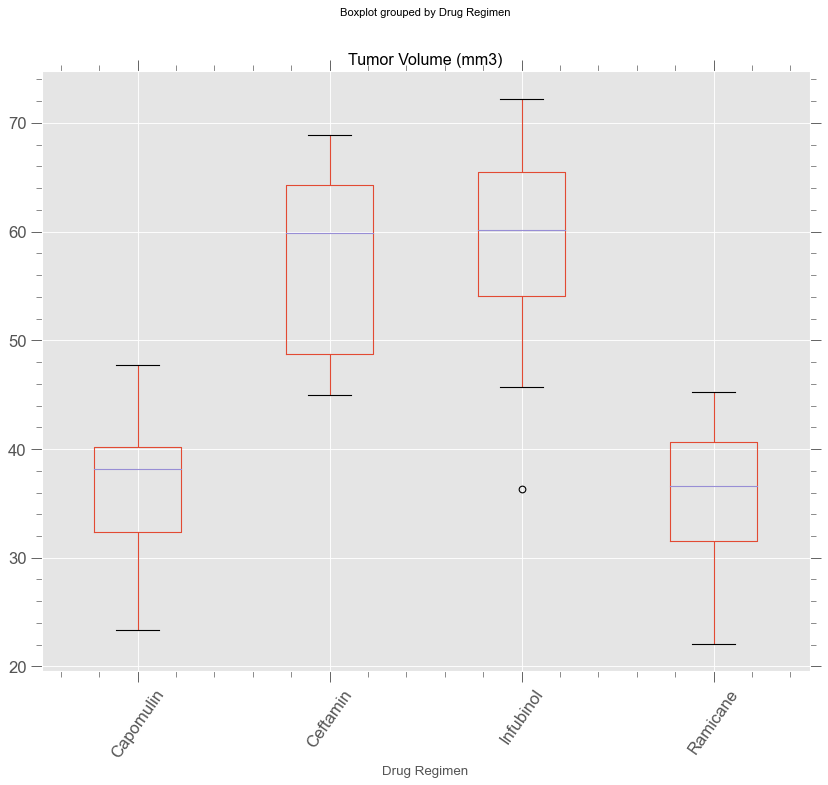

In [52]:

fig, ax=plt.subplots()
df_greater.boxplot(by='Drug Regimen',column=['Tumor Volume (mm3)'],
                   rot=55, fontsize=15,ax=ax)

plt.show()

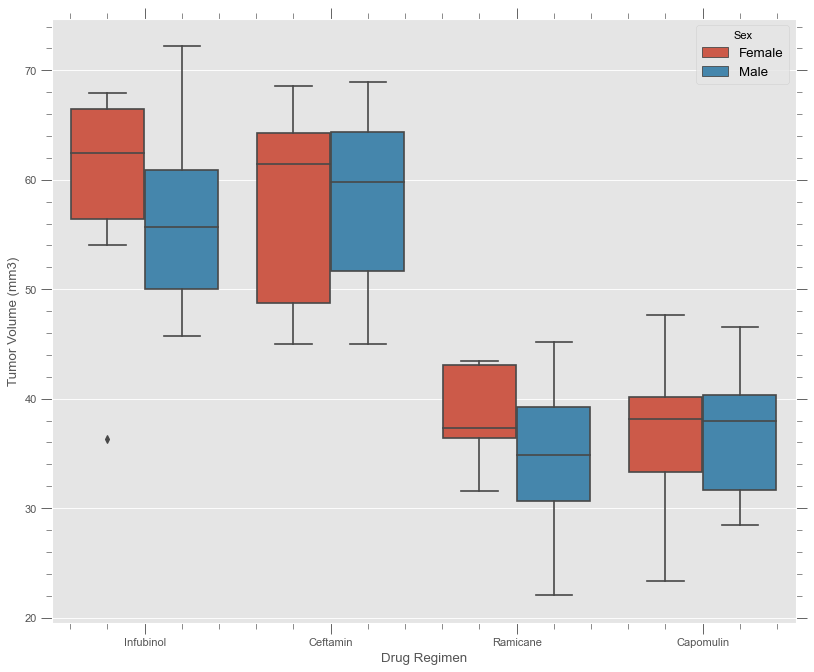

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax=plt.subplots()
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)',data=df_greater, 
            hue='Sex', ax=ax)
plt.show()

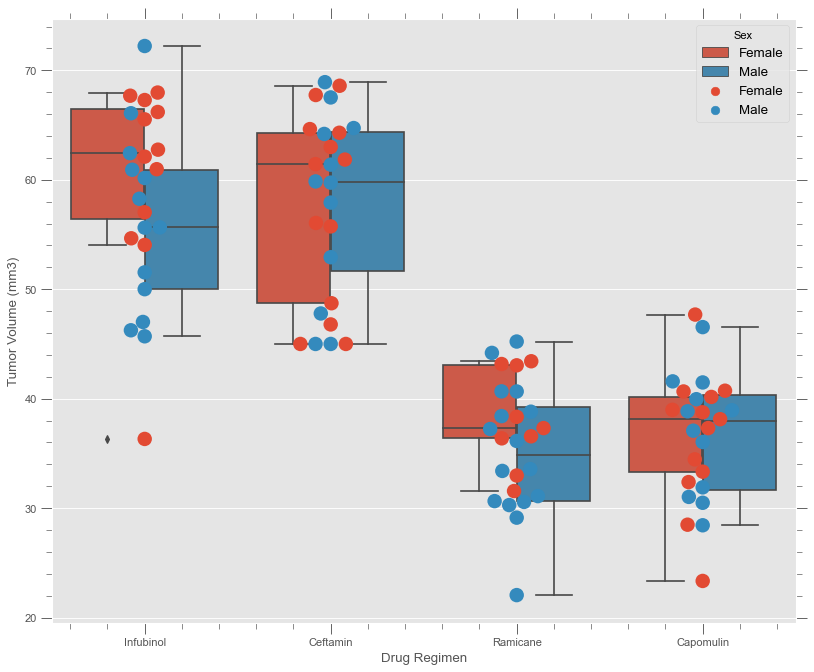

In [54]:
fig, ax=plt.subplots()
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)',data=df_greater, 
            hue='Sex', ax=ax)
sns.swarmplot(x='Drug Regimen', y='Tumor Volume (mm3)',data=df_greater, 
            hue='Sex',size=13, ax=ax)
plt.show()

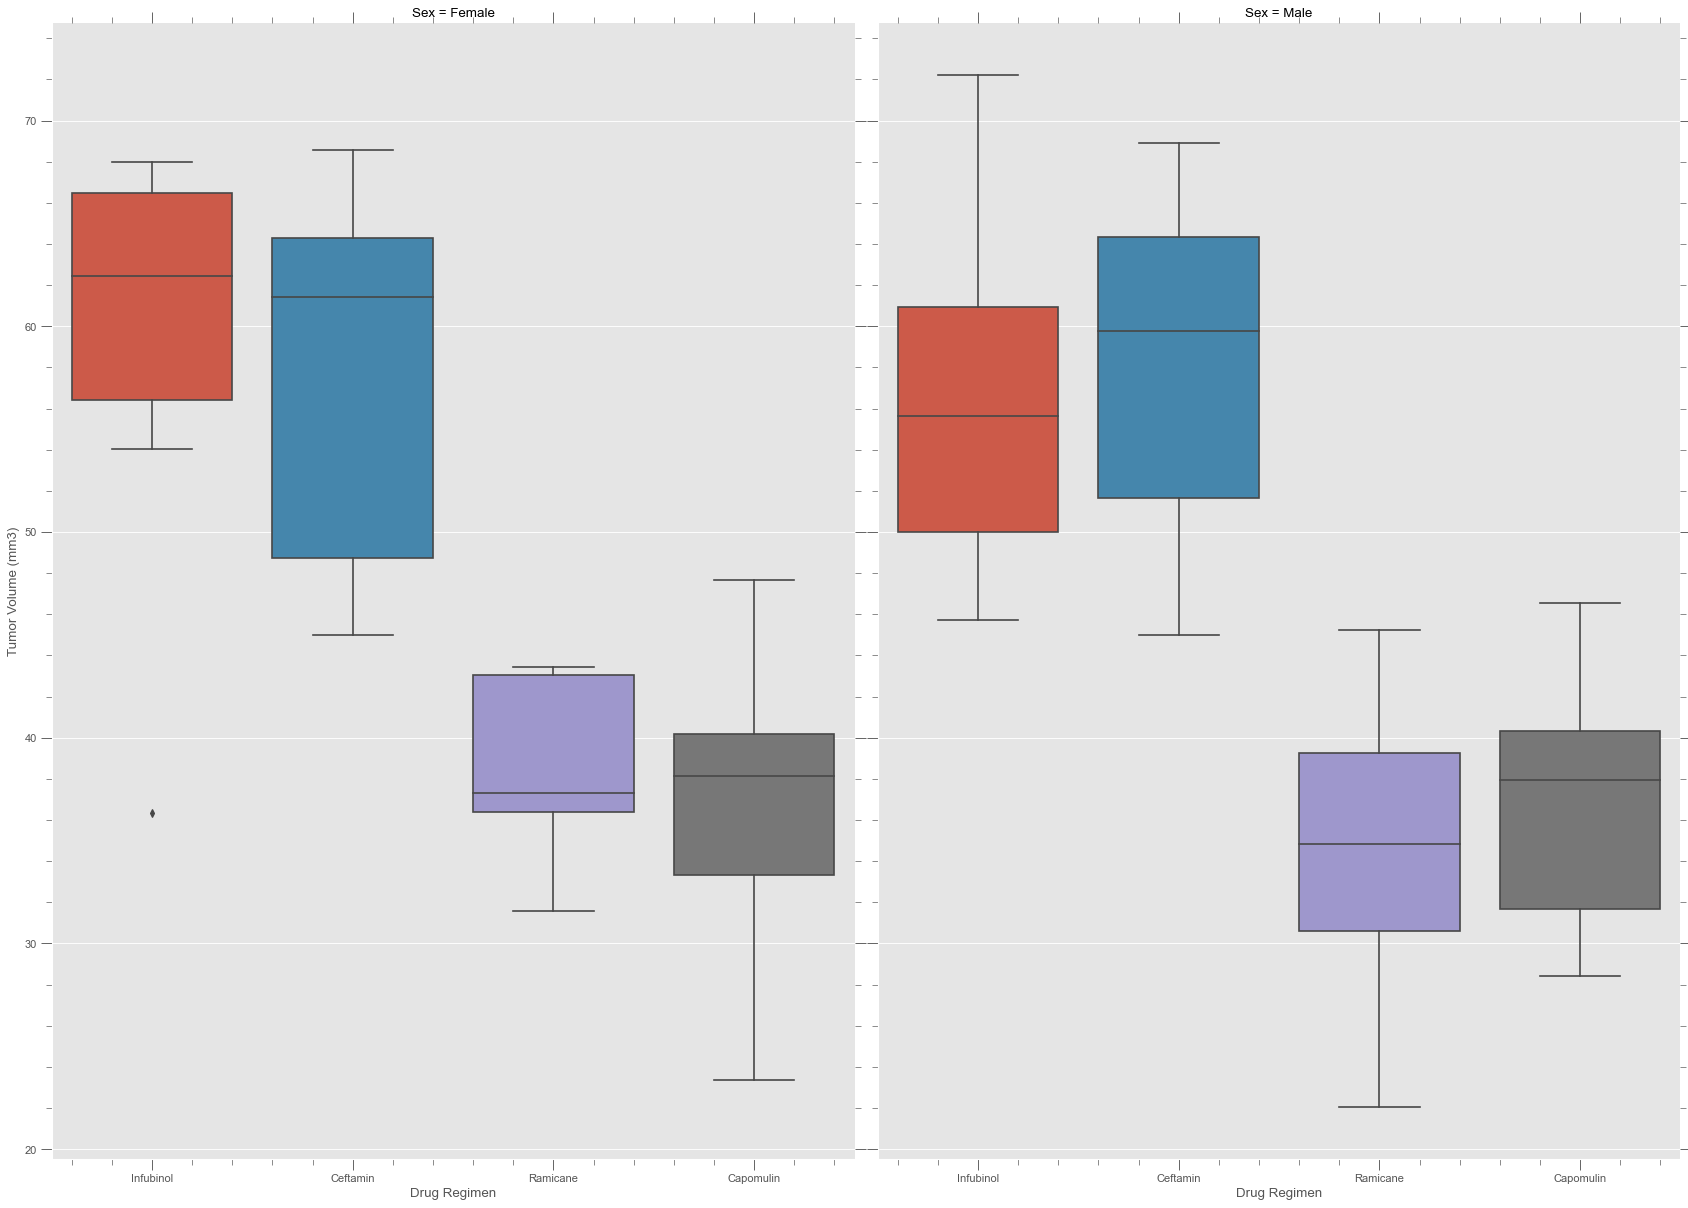

In [55]:
g=sns.catplot(x='Drug Regimen', y='Tumor Volume (mm3)',kind='box',
              data=df_greater, col='Sex',height=15, aspect=.7)
plt.show()

## Line and Scatter Plots

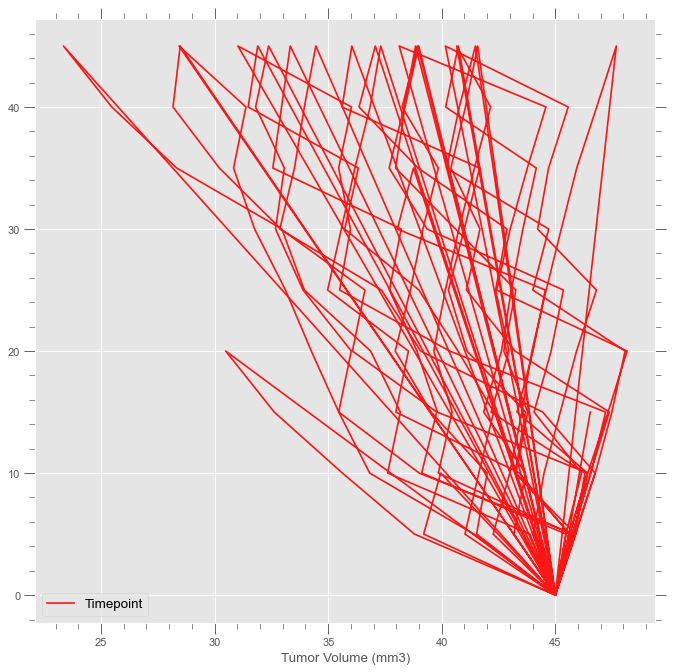

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df_camp=df_combined[df_combined['Drug Regimen']=='Capomulin']
fig, ax=plt.subplots(figsize=(10,10))
df_camp.plot(x='Tumor Volume (mm3)', y='Timepoint',kind='line',color='red', alpha=0.9,  ax=ax)
plt.show()

In [57]:
df_camp

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


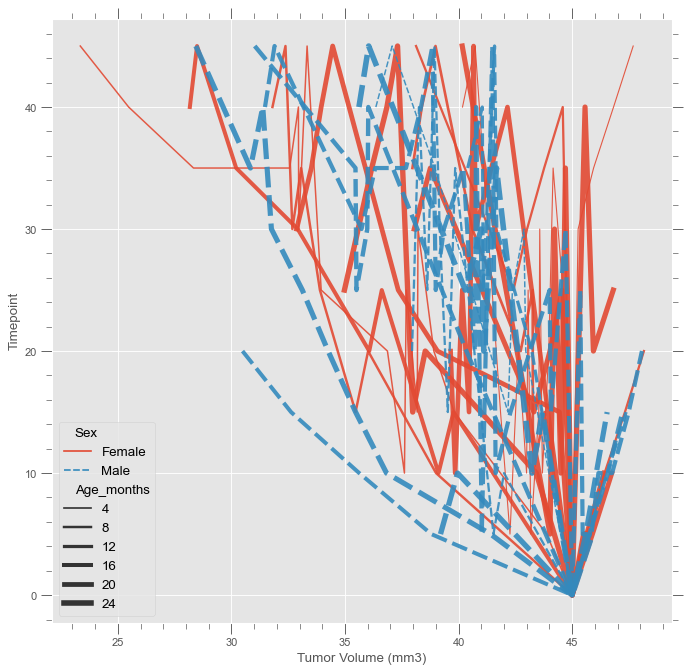

In [58]:
fig, ax=plt.subplots(figsize=(10,10))
sns.lineplot(x='Tumor Volume (mm3)', y='Timepoint', hue='Sex', 
                size='Age_months',style='Sex',sizes=(1,5),
                data=df_camp,alpha=0.9,ax=ax)
plt.show()

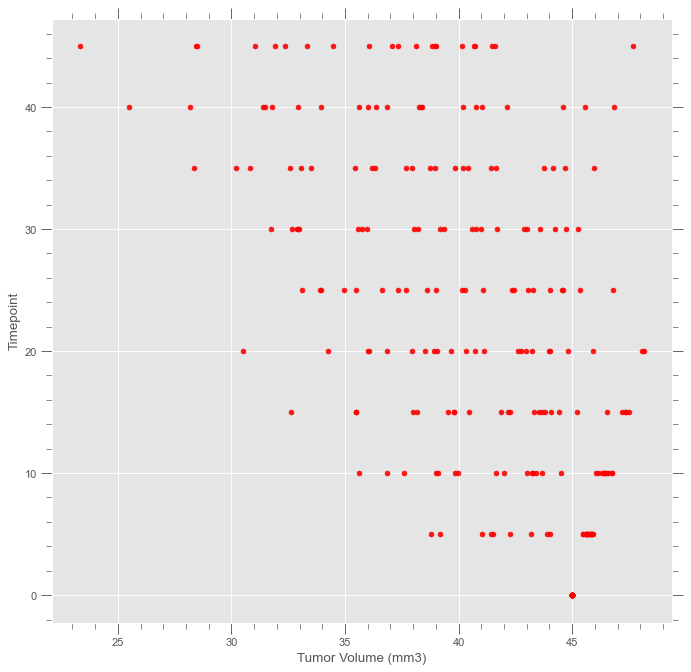

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df_camp=df_combined[df_combined['Drug Regimen']=='Capomulin']
fig, ax=plt.subplots(figsize=(10,10))
df_camp.plot(x='Tumor Volume (mm3)', y='Timepoint',kind='scatter',color='red', alpha=0.9,  ax=ax)
plt.show()

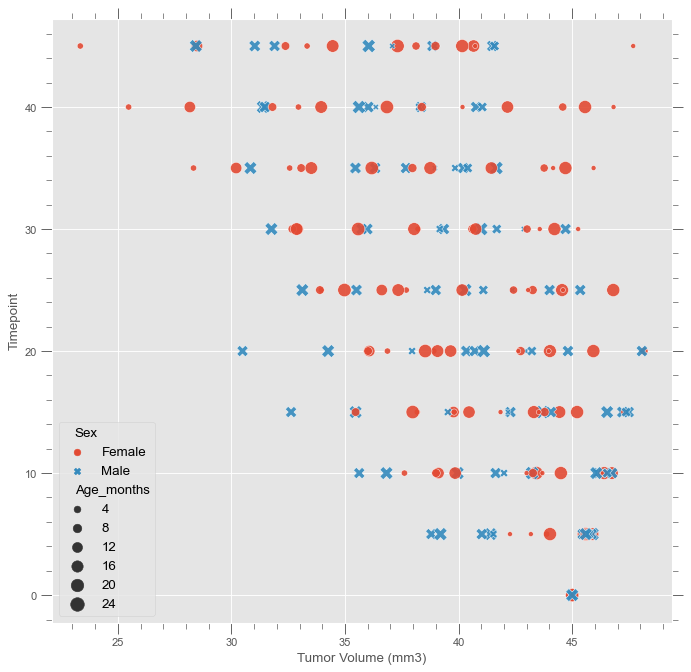

In [60]:
fig, ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x='Tumor Volume (mm3)', y='Timepoint', hue='Sex', 
                size='Age_months',style='Sex',sizes=(20, 150),
                data=df_camp,alpha=0.9,ax=ax)
plt.show()

In [61]:
df_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


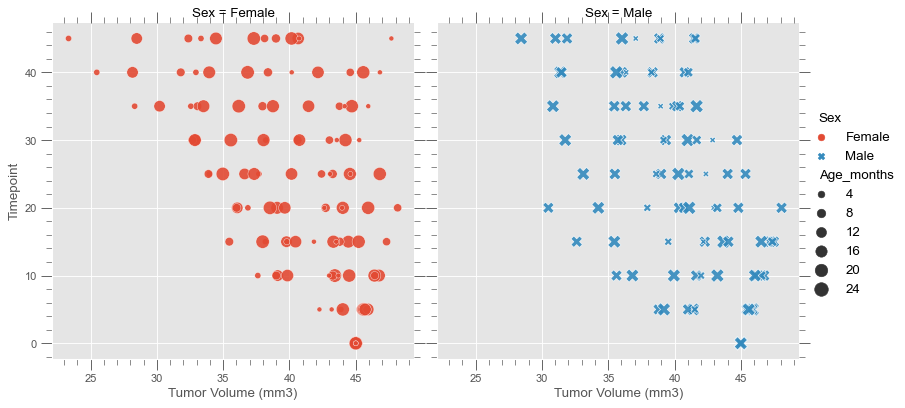

In [62]:
sns.relplot(x='Tumor Volume (mm3)', y='Timepoint', hue='Sex', 
                size='Age_months',style='Sex',sizes=(20, 150),
                data=df_camp,alpha=0.9, col='Sex')
plt.show()

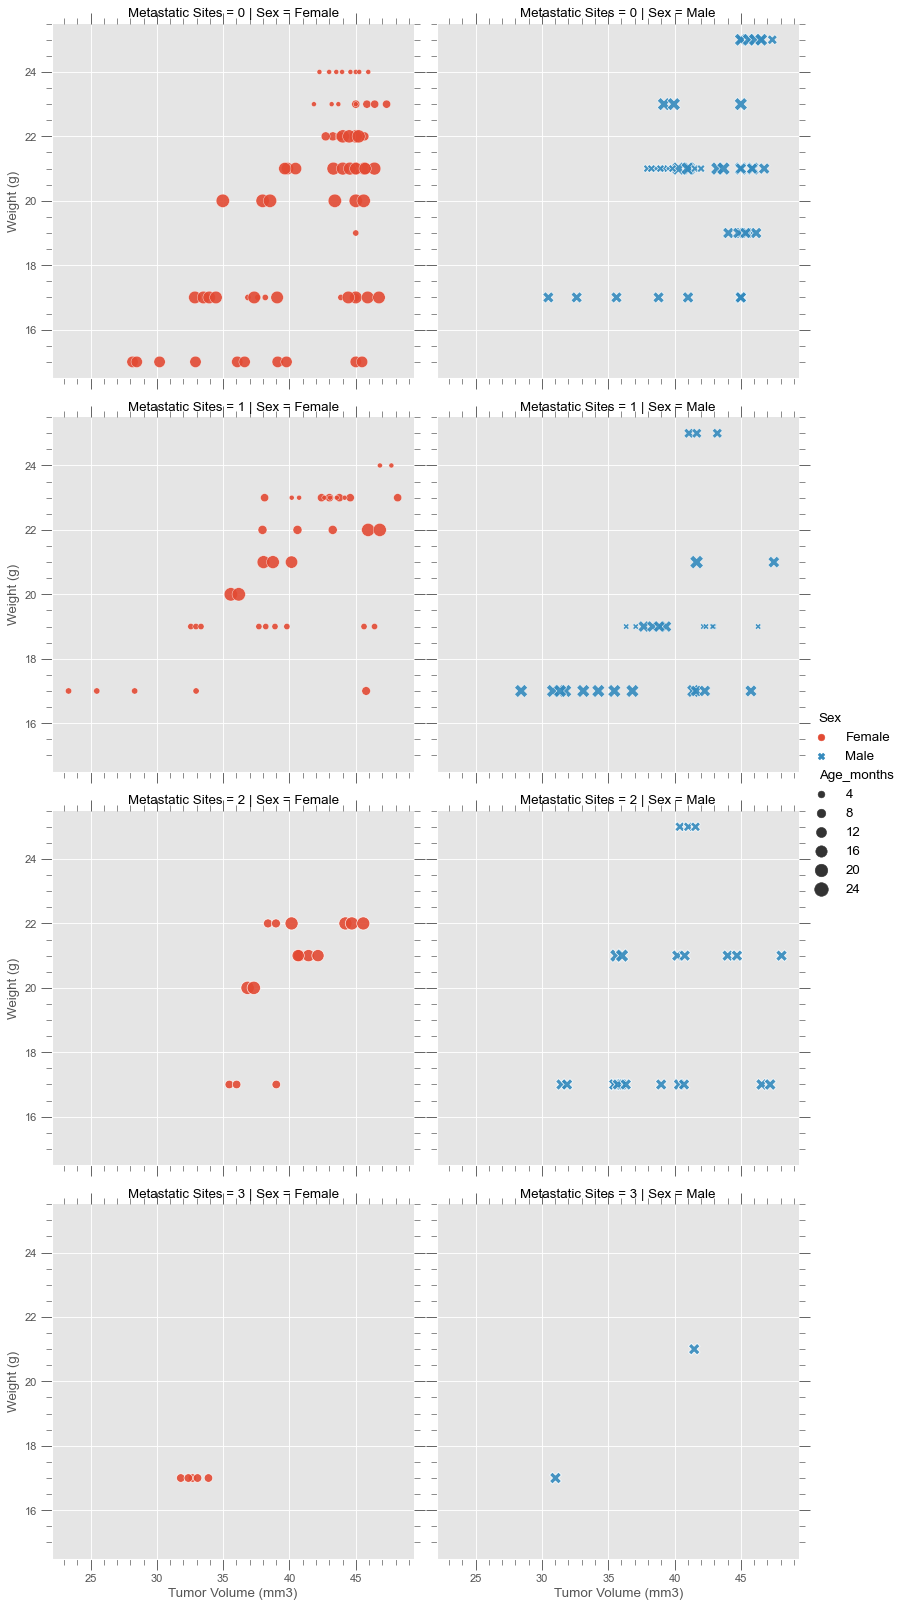

In [63]:
sns.relplot(x='Tumor Volume (mm3)', y='Weight (g)', hue='Sex', 
                size='Age_months',style='Sex',sizes=(20, 150),
                data=df_camp,alpha=0.9, col='Sex', row='Metastatic Sites')
plt.show()

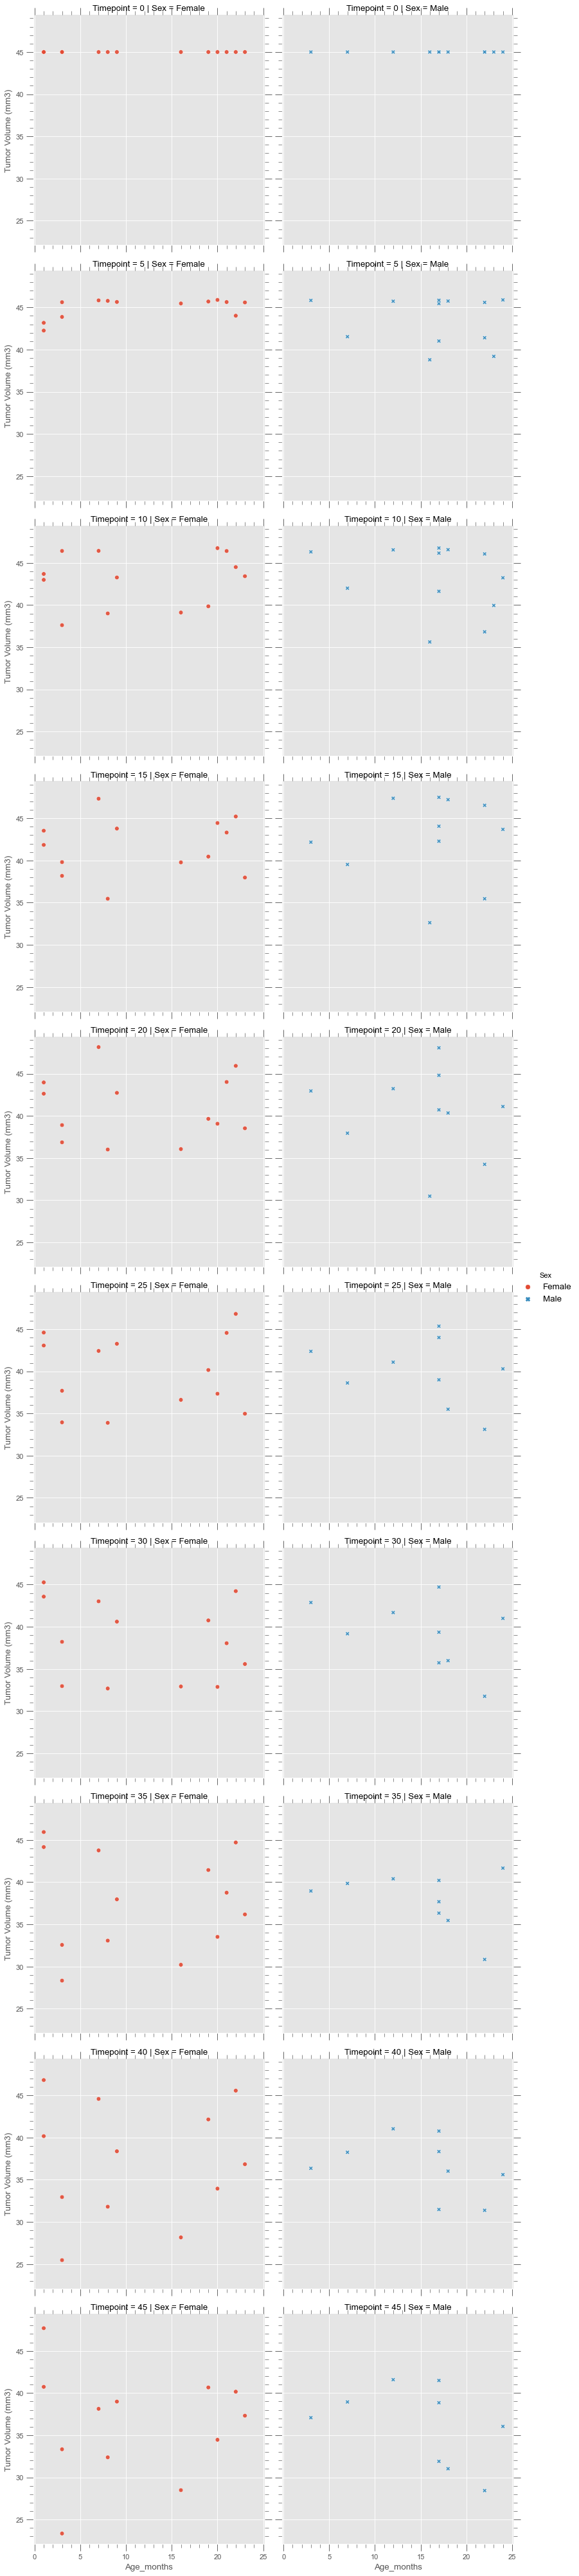

In [64]:
sns.relplot(x='Age_months', y='Tumor Volume (mm3)', hue='Sex', 
                style='Sex',sizes=(20, 150),
                data=df_camp,alpha=0.9, col='Sex', row='Timepoint')
plt.show()

In [65]:

# Create a new plot: plot

plot=figure(height=600, width=800,
            x_axis_label="Tumor Volume", 
             y_axis_label="Timepoint",
             title='Bookeh Bar Plot')

source=ColumnDataSource(df_camp)

# Add circles at x and y
plot.circle(x='Tumor Volume (mm3)', y='Timepoint', color='green', 
            size=10, hover_fill_color='firebrick', hover_alpha=0.5,
         hover_line_color='white', source=source)
hover=HoverTool(tooltips=None, mode='hline')
plot.add_tools(hover)
plot.xgrid.grid_line_color = None
show(plot)

In [66]:

# Create a new plot: plot

plot1=figure(height=600, width=800,
            x_axis_label="Tumor Volume", 
             y_axis_label="Timepoint",
             title='Bookeh Bar Plot')
plot2=figure(height=600, width=800,
            x_axis_label="Tumor Volume", 
             y_axis_label="Timepoint",
             title='Bookeh Bar Plot')
plot3=figure(height=600, width=800,
            x_axis_label="Tumor Volume", 
             y_axis_label="Timepoint",
             title='Bookeh Bar Plot')
plot4=figure(height=600, width=800,
            x_axis_label="Tumor Volume", 
             y_axis_label="Timepoint",
             title='Bookeh Bar Plot')
source=ColumnDataSource(df_camp)

# Add circles at x and y
plot1.circle(x='Tumor Volume (mm3)', y='Timepoint', color='green', 
            size=10, hover_fill_color='firebrick', hover_alpha=0.5,
         hover_line_color='white', source=source)
plot2.circle(x='Tumor Volume (mm3)', y='Weight (g)', color='blue', 
            size=10, hover_fill_color='firebrick', hover_alpha=0.5,
         hover_line_color='white', source=source)
plot3.circle(x='Tumor Volume (mm3)', y='Age_months', color='red', 
            size=10, hover_fill_color='firebrick', hover_alpha=0.5,
         hover_line_color='white', source=source)


first=Panel(child=plot1, title='Timepoint')
second=Panel(child=plot2, title='Weight')
third=Panel(child=plot3, title='Age_months')


tabs=Tabs(tabs=[first, second,third])
hover=HoverTool(tooltips=None, mode='hline')
plot1.add_tools(hover)
plot2.add_tools(hover)
plot3.add_tools(hover)


show(tabs)

## Correlation and Regression

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [99]:
df_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [165]:
df_capo=df_combined[df_combined['Drug Regimen']=="Capomulin"]
df_corr=df_capo.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean',
                                'Weight (g)':lambda x: x.unique()})

#df_corr=df_capo.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean','Weight (g)':'mean'})
df_corr

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


In [166]:
correlation=sts.pearsonr(df_corr['Tumor Volume (mm3)'], df_corr['Weight (g)'])
correlation[0]

0.841936342469472

In [167]:
corr=df_combined.corr()
corr

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Age_months,1.000000,0.004332,0.014385,0.041398,0.056045
Weight (g),0.004332,1.000000,-0.086400,0.587640,0.172381
Timepoint,0.014385,-0.086400,1.000000,0.444063,0.646518
Tumor Volume (mm3),0.041398,0.587640,0.444063,1.000000,0.533706
Metastatic Sites,0.056045,0.172381,0.646518,0.533706,1.000000


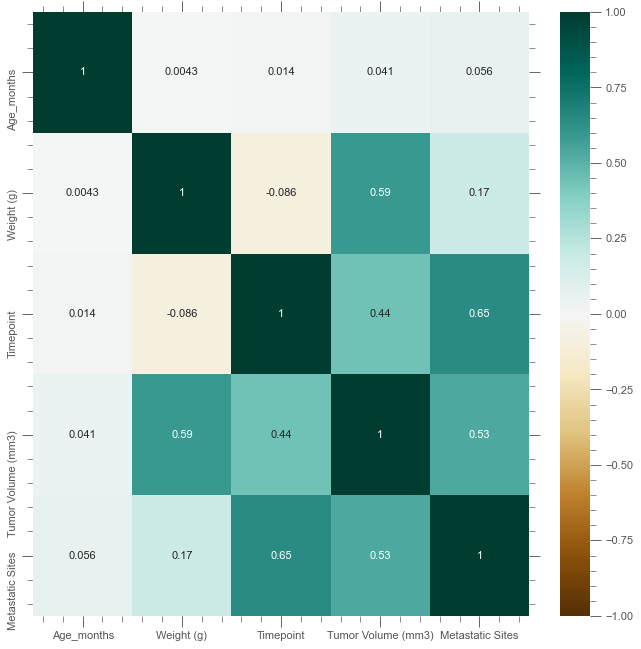

In [168]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,vmin=-1, vmax=1, annot=True, ax=ax, cmap='BrBG')
plt.show()

The r-squared is: 0.7088568047708723


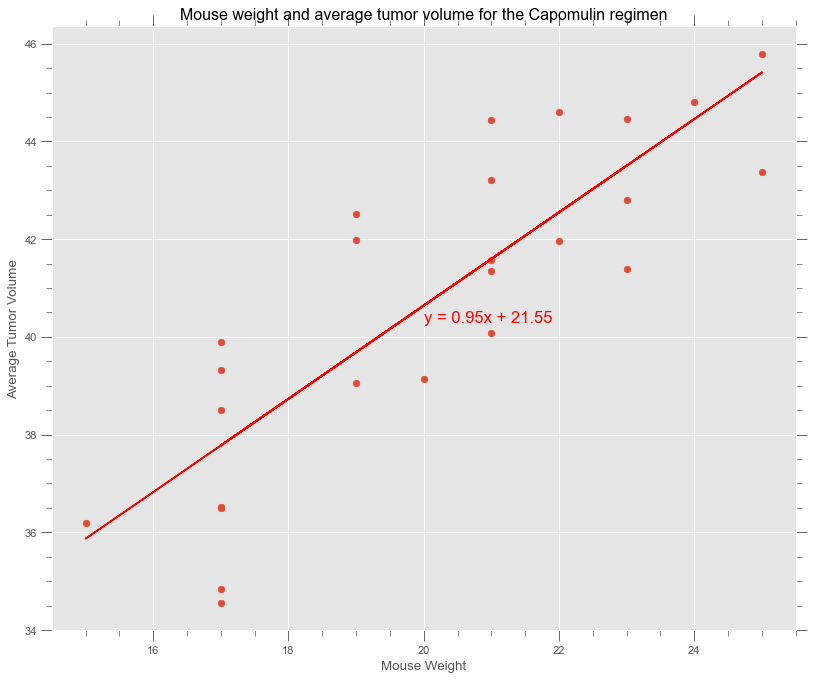

In [169]:
y_values = df_corr['Tumor Volume (mm3)']
x_values = df_corr['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40.3),fontsize=15,color="red")
plt.ylabel('Average Tumor Volume')
plt.xlabel('Mouse Weight')
plt.title('Mouse weight and average tumor volume for the Capomulin regimen')
print(f"The r-squared is: {rvalue**2}")
plt.show()

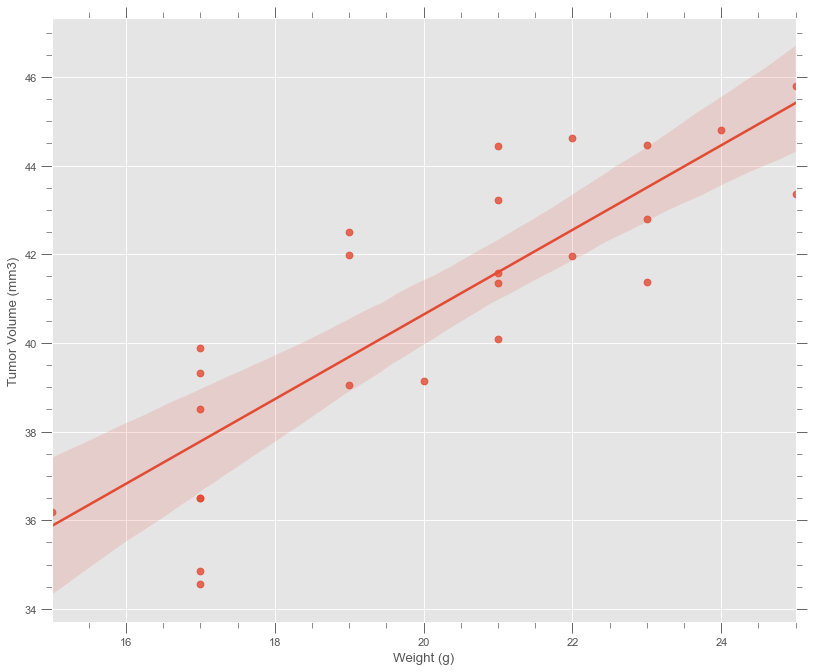

In [170]:
fig, ax=plt.subplots()
sns.regplot(x='Weight (g)', y='Tumor Volume (mm3)', 
                data=df_corr, ax=ax)
plt.show()